We have packaged `extractTransform` from Vega Lite up as a mime renderer:

In [6]:
from IPython.display import display

In [7]:
SPEC ={
 "data": {
  "url": "https://vega.github.io/vega-lite/data/seattle-weather.csv"
 },
 "layer": [
  {
   "mark": "bar",
   "encoding": {
    "x": {
     "timeUnit": "month",
     "field": "date",
     "type": "ordinal"
    },
    "y": {
     "aggregate": "mean",
     "field": "precipitation",
     "type": "quantitative",
     "axis": {
      "grid": False
     }
    }
   }
  },
  {
   "mark": "line",
   "encoding": {
    "x": {
     "timeUnit": "month",
     "field": "date",
     "type": "ordinal"
    },
    "y": {
     "aggregate": "mean",
     "field": "temp_max",
     "type": "quantitative",
     "axis": {
      "grid": False
     },
     "scale": {
      "zero": False
     }
    },
    "color": {
     "value": "firebrick"
    }
   }
  }
 ],
 "resolve": {
  "scale": {
   "y": "independent"
  }
 }
}

Let's look at this chart:

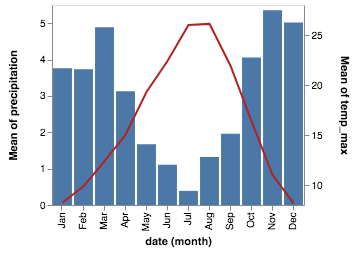

In [6]:
display({"application/vnd.vegalite.v2+json": SPEC}, raw=True)

OK now let's send this to the backend to transform it and render it when done:

In [11]:
COMM_ID = 'some-unique-iddd'

In [17]:
new_spec = None

In [18]:
from ipykernel.comm import Comm

# Use comm to send a message from the kernel
my_comm = Comm(target_name=COMM_ID, data=SPEC)
my_comm.send({'foo': 2})

# Add a callback for received messages.
@my_comm.on_msg
def _recv(msg):
    global new_spec
    new_spec = msg['content']['data']


In [22]:
new_spec

{'data': {'url': 'https://vega.github.io/vega-lite/data/seattle-weather.csv'},
 'resolve': {'scale': {'y': 'independent'}},
 'layer': [{'transform': [{'timeUnit': 'month',
     'field': 'date',
     'as': 'month_date'},
    {'aggregate': [{'op': 'mean',
       'as': 'mean_precipitation',
       'field': 'precipitation'}],
     'groupby': ['month_date']}],
   'mark': 'bar',
   'encoding': {'x': {'title': 'date (month)',
     'type': 'ordinal',
     'field': 'month_date',
     'axis': {'format': '%b'}},
    'y': {'title': 'Mean of precipitation',
     'type': 'quantitative',
     'axis': {'grid': False},
     'field': 'mean_precipitation'}}},
  {'transform': [{'timeUnit': 'month', 'field': 'date', 'as': 'month_date'},
    {'aggregate': [{'op': 'mean', 'as': 'mean_temp_max', 'field': 'temp_max'}],
     'groupby': ['month_date']}],
   'mark': 'line',
   'encoding': {'x': {'title': 'date (month)',
     'type': 'ordinal',
     'field': 'month_date',
     'axis': {'format': '%b'}},
    'y': {

Now let's transform the spec to return a new one with the transformed extracted:

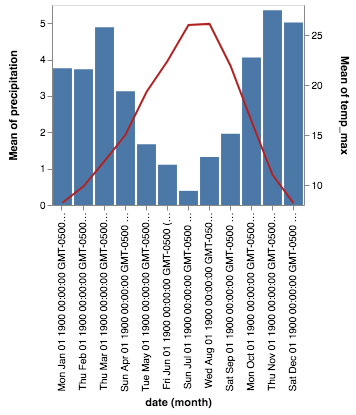

In [21]:
display({"application/vnd.vegalite.v2+json": new_spec}, raw=True)